# Face recognition in image and video

**Problem statement:** Perform face recognition of presidents attending the G8 summit

**SET THE WORKING DIRECTORY SO THAT WE DO NOT HAVE TO THINK ABOUT PATH PROBLEMS**

Please ensure all your folder names <font color='red'><b>do not have a space & use forward slash (/)</b></font>

### Install packages

In [17]:
!pip install face_recognition

In [18]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


### Load Dataset 

In [0]:
import face_recognition
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline

# Load dataset pictures 
bo_image = face_recognition.load_image_file("/gdrive/My Drive/Introduction to AI/Case Study/images/Barack_Obama/Barack_Obama_0001.jpg")
vp_image = face_recognition.load_image_file("/gdrive/My Drive/Introduction to AI/Case Study/images/Vladimir_Putin/Vladimir_Putin_0011.jpg")
em_image = face_recognition.load_image_file("/gdrive/My Drive/Introduction to AI/Case Study/images/Emmanuel_Macron/Emmanuel_Macron_0001.jpg")
jt_image = face_recognition.load_image_file("/gdrive/My Drive/Introduction to AI/Case Study/images/Justin_Trudeau/Justin_Trudeau_0001.jpg")
dt_image = face_recognition.load_image_file("/gdrive/My Drive/Introduction to AI/Case Study/images/Donald_Trump/Donald_Trump_0001.jpg")
am_image = face_recognition.load_image_file("/gdrive/My Drive/Introduction to AI/Case Study/images/Angela_Merkel/Angela_Merkel_0001.jpg")

### Learn facial features using pretrained model

In [0]:
## Learn how to recognize faces using pretrained model

bo_face_encoding = face_recognition.face_encodings(bo_image)[0]
vp_face_encoding = face_recognition.face_encodings(vp_image)[0]
em_face_encoding = face_recognition.face_encodings(em_image)[0]
jt_face_encoding = face_recognition.face_encodings(jt_image)[0]
dt_face_encoding = face_recognition.face_encodings(dt_image)[0]
am_face_encoding = face_recognition.face_encodings(am_image)[0]
known_faces = [
    bo_face_encoding,
    vp_face_encoding,
    em_face_encoding,
    jt_face_encoding,
    dt_face_encoding,
    am_face_encoding
    
]

In [0]:
# @hidden_cell
def face_detect(video_file, known_faces):
	# Open the input movie file
	input_movie = cv2.VideoCapture(video_file)
	length = int(input_movie.get(cv2.CAP_PROP_FRAME_COUNT))

	# Create an output movie file (make sure resolution/frame rate matches input video!)
	fourcc = cv2.VideoWriter_fourcc(*'XVID')
	output_movie = cv2.VideoWriter('output_talks_g20_final.avi', fourcc, 29.97, (1280, 720))


	# Initialize some variables
	face_locations = []
	face_encodings = []
	face_names = []
	frame_number = 0

	while True:
		# Grab a single frame of video
		ret, frame = input_movie.read()
		frame_number += 1

		# Quit when the input video file ends
		if not ret:
			break

		# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
		rgb_frame = frame[:, :, ::-1]

		# Find all the faces and face encodings in the current frame of video
		face_locations = face_recognition.face_locations(rgb_frame)
		face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

		face_names = []
		for face_encoding in face_encodings:
			# See if the face is a match for the known face(s)
			match = face_recognition.compare_faces(known_faces, face_encoding, tolerance=0.50)

			# If you had more than 2 faces, you could make this logic a lot prettier
			# but I kept it simple for the demo
			name = None
			if match[0]:
				name = "Barack Obama"
			elif match[1]:
				name = "Vladimir Putin"
			elif match[2]:
				name = "Emmanuel Macron"
			elif match[3]:
				name = "Justin_Trudeau"
			elif match[4]:
				name = "Donald Trump"
			elif match[5]:
				name = "Angela Merkel"
			face_names.append(name)

    # Label the results
		for (top, right, bottom, left), name in zip(face_locations, face_names):
			if not name:
				continue

        # Draw a box around the face
			cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        # Draw a label with a name below the face
			cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
			font = cv2.FONT_HERSHEY_DUPLEX
			cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Write the resulting image to the output video file
		print("Writing frame {} / {}".format(frame_number, length))
		output_movie.write(frame)

# All done!
	input_movie.release()
	cv2.destroyAllWindows()


In [0]:
# @hidden_cell
def face_detect_image(unknown_image, known_face_encodings):

    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)
    
    pil_image = Image.fromarray(unknown_image)
    # Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)

    # Loop through each face found in the unknown image
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        match = face_recognition.compare_faces(known_face_encodings, face_encoding)

        name = "Unknown"
        face_names = []
        # If a match was found in known_face_encodings, just use the first one.
        #name = None
        if match[0]:
            name = "Barack Obama"
        elif match[1]:
            name = "Vladimir Putin"
        elif match[2]:
            name = "Emmanuel Macron"
        elif match[3]:
            name = "Justin_Trudeau"
        elif match[4]:
            name = "Donald Trump"
        elif match[5]:
            name = "Angela Merkel"
        face_names.append(name)

        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(name)
        draw.rectangle(((left+5, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
        draw.text((left, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


    # Remove the drawing library from memory as per the Pillow docs
    del draw

    # Display the resulting image
    #pil_image.show()
    plt.figure(figsize=(15,15))
    plt.imshow(pil_image)
    #You can also save a copy of the new image to disk if you want by uncommenting this line
    pil_image.save("image_with_boxes.jpg")
    


### Face recognition on images

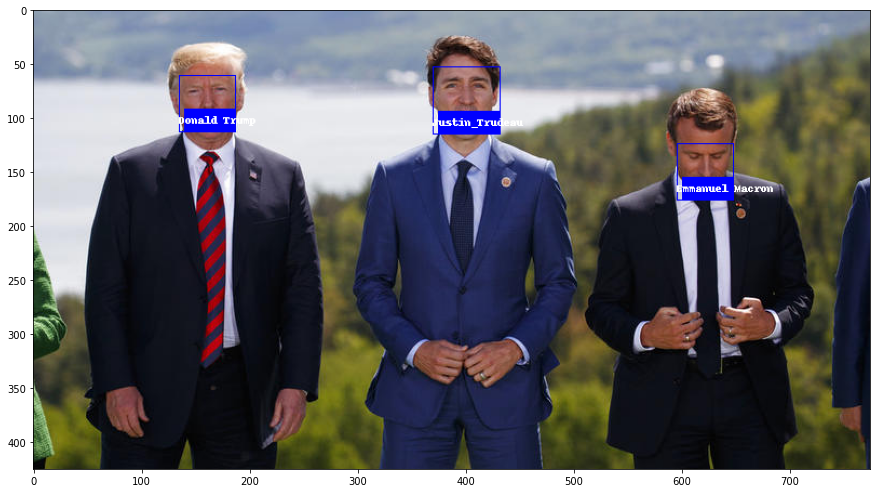

In [23]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("/gdrive/My Drive/Introduction to AI/Case Study/image_new.jpg")
# Find all the faces and face encodings in the unknown image
face_detect_image(unknown_image, known_faces) 

### Face recognition on a video file

In [0]:
# Load a video 
video_file_name="/gdrive/My Drive/Introduction to AI/Case Study/_5bNhI7QQj4.mp4"
# Find all the faces and face encodings in the unknown video
face_detect(video_file_name, known_faces)

In [25]:
# Import the required modules
%pylab inline 
import cv2
from IPython.display import clear_output

# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv2.VideoCapture("output_talks_g20_final.avi")

try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print ("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Turn off the axis
        axis('off')
        
        # Title of the window
        title("Input Stream")
        # Display the frame
        figsize(20,10)
        imshow(frame)
        show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")

Populating the interactive namespace from numpy and matplotlib
Released Video Resource
